# Convolutional NN for "Apple or Orange" Classifier

### Installing python packages

In [1]:
!pip install --user tensorflow numpy keras pillow

You should consider upgrading via the 'pip install --upgrade pip' command.


## Dataset Download

It is needed to download the fruit dataset generated from the link available into the report.

In [2]:
!unzip -n fruits-dataset.zip

Archive:  fruits-dataset.zip
  inflating: fruits-dataset/train/apple.0.jpg  
  inflating: fruits-dataset/train/apple.1.jpg  
 extracting: fruits-dataset/train/apple.10.jpg  
  inflating: fruits-dataset/train/apple.11.jpg  
  inflating: fruits-dataset/train/apple.12.jpg  
 extracting: fruits-dataset/train/apple.13.jpg  
  inflating: fruits-dataset/train/apple.14.jpg  
 extracting: fruits-dataset/train/apple.15.jpg  
  inflating: fruits-dataset/train/apple.16.jpg  
 extracting: fruits-dataset/train/apple.17.jpg  
 extracting: fruits-dataset/train/apple.18.jpg  
  inflating: fruits-dataset/train/apple.19.jpg  
  inflating: fruits-dataset/train/apple.2.jpg  
  inflating: fruits-dataset/train/apple.20.jpg  
 extracting: fruits-dataset/train/apple.21.jpg  
  inflating: fruits-dataset/train/apple.22.jpg  
  inflating: fruits-dataset/train/apple.23.jpg  
 extracting: fruits-dataset/train/apple.24.jpg  
  inflating: fruits-dataset/train/apple.25.jpg  
  inflating: fruits-dataset/train/apple.26.

## Splitting Dataset
Code based in [Machine Learning Mastery](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)

The dataset folder `train/` will be splitted into the next hierarchy:
- train/
    - train/
        - apples/
        - oranges/
    - validation/
        - apples/
        - oranges/
- test/
    - apples/
    - oranges/
    
Where `train/` has a probability of 80% of the dataset and `test` has 20%. The `train/validation/` has 25% of all train dataset, hence the `train/train` has 75%.

In [3]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import move
from random import seed
from random import random
# create directories
dataset_home = 'fruits-dataset/'
subdirs = ['train/train/', 'train/validation/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['apples/', 'oranges/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# Define ratio of pictures to be used for test
test_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = dataset_home
for file in listdir(src_directory+"train/"):
    if(file=="train" or file=="validation"):
        continue
    src = src_directory + 'train/' + file

    # Defining if the sample will be saved as Train, Validation or Test
    if random() < val_ratio:
        dst_dir = 'train/validation/'
    elif(random() < test_ratio):
        dst_dir = 'test/'
    else:
        dst_dir = 'train/train/'
        
    if file.startswith('apple'):
        dst = dataset_home + dst_dir + 'apples/'  + file
        print(src," ", dst)
        move(src, dst)
    elif file.startswith('orange'):
        dst = dataset_home + dst_dir + 'oranges/'  + file
        print(src," ", dst)
        move(src, dst)

fruits-dataset/train/apple.66.jpg   fruits-dataset/train/validation/apples/apple.66.jpg
fruits-dataset/train/orange.31.jpg   fruits-dataset/train/train/oranges/orange.31.jpg
fruits-dataset/train/apple.76.jpg   fruits-dataset/train/train/apples/apple.76.jpg
fruits-dataset/train/orange.62.jpg   fruits-dataset/train/train/oranges/orange.62.jpg
fruits-dataset/train/orange.89.jpg   fruits-dataset/test/oranges/orange.89.jpg
fruits-dataset/train/orange.50.jpg   fruits-dataset/train/validation/oranges/orange.50.jpg
fruits-dataset/train/apple.71.jpg   fruits-dataset/train/train/apples/apple.71.jpg
fruits-dataset/train/apple.3.jpg   fruits-dataset/test/apples/apple.3.jpg
fruits-dataset/train/orange.54.jpg   fruits-dataset/train/train/oranges/orange.54.jpg
fruits-dataset/train/apple.78.jpg   fruits-dataset/train/validation/apples/apple.78.jpg
fruits-dataset/train/orange.27.jpg   fruits-dataset/train/train/oranges/orange.27.jpg
fruits-dataset/train/orange.3.jpg   fruits-dataset/train/validation/or

fruits-dataset/train/orange.2.jpg   fruits-dataset/train/train/oranges/orange.2.jpg
fruits-dataset/train/orange.37.jpg   fruits-dataset/train/train/oranges/orange.37.jpg
fruits-dataset/train/orange.18.jpg   fruits-dataset/train/validation/oranges/orange.18.jpg
fruits-dataset/train/orange.9.jpg   fruits-dataset/train/train/oranges/orange.9.jpg
fruits-dataset/train/apple.11.jpg   fruits-dataset/train/train/apples/apple.11.jpg
fruits-dataset/train/apple.61.jpg   fruits-dataset/train/train/apples/apple.61.jpg
fruits-dataset/train/apple.84.jpg   fruits-dataset/train/train/apples/apple.84.jpg
fruits-dataset/train/apple.5.jpg   fruits-dataset/train/validation/apples/apple.5.jpg
fruits-dataset/train/orange.15.png   fruits-dataset/test/oranges/orange.15.png
fruits-dataset/train/apple.55.jpg   fruits-dataset/train/validation/apples/apple.55.jpg
fruits-dataset/train/apple.64.jpg   fruits-dataset/test/apples/apple.64.jpg
fruits-dataset/train/orange.85.jpg   fruits-dataset/train/train/oranges/orang

## Making Dataset Generators for Train, Validation and Test

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generator for train
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

# Data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generator for test
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        dataset_home + 'train/train/', # Target directory
        target_size=(150, 150), # Resizing images
        batch_size=20, # 20 images per request
        class_mode='binary') # Binary classification (because it has 2 subdirectories, cats and dogs)

validation_generator = validation_datagen.flow_from_directory(
        dataset_home + 'train/validation/',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        dataset_home + 'test/',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 107 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


## Convolutional NN model

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

lr = 0.001
momentum = 0.9

steps_per_epoch=100
epochs=5
validation_steps=50

def convModel(lr, momentum):
    # Layers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile parameters
    opt = optimizers.SGD(lr=lr, momentum=momentum)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = convModel(lr, momentum)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

## Training the model

In [7]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=steps_per_epoch,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_steps)

Epoch 1/5
100/100 [==============================] - 87s 866ms/step - loss: 0.5108 - accuracy: 0.7729 - val_loss: 0.0732 - val_accuracy: 0.9847
Epoch 2/5
100/100 [==============================] - 87s 868ms/step - loss: 0.1541 - accuracy: 0.9381 - val_loss: 0.0299 - val_accuracy: 0.9834
Epoch 3/5
100/100 [==============================] - 89s 889ms/step - loss: 0.0558 - accuracy: 0.9820 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 87s 871ms/step - loss: 0.0540 - accuracy: 0.9798 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 88s 878ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0278 - val_accuracy: 0.9847


## Plotting Loss and Accuracy on Training Dataset

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotTrainRes(history):
    plt.figure()
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='Train')
    plt.plot(history.history['val_loss'], color='orange', label='Validation')
    plt.legend()
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='Train')
    plt.plot(history.history['val_accuracy'], color='orange', label='Validation')
    plt.legend()
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

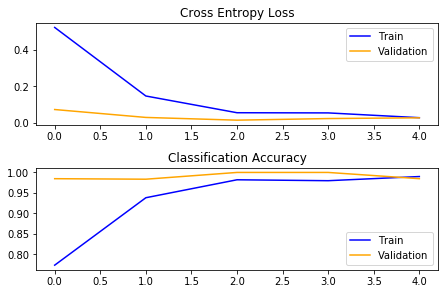

In [9]:
plotTrainRes(history)

## Plotting Loss and Accuracy on Training Dataset

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotTrainRes(history):
    plt.figure()
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='Train')
    plt.plot(history.history['val_loss'], color='orange', label='Validation')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='Train')
    plt.plot(history.history['val_accuracy'], color='orange', label='Validation')
    plt.legend()
    plt.show()

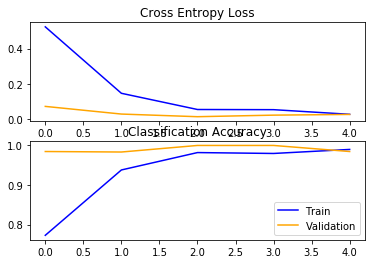

In [11]:
plotTrainRes(history)

## Evaluating in the test dataset

In [12]:
eval = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print("Loss: {}\nAccuracy: {}".format(eval[0], eval[1]))

2/2 [==============================] - 1s 459ms/step - loss: 0.1581 - accuracy: 0.9677
Loss: 0.15811775624752045
Accuracy: 0.9677419066429138


## Varying the learning rate value

In [13]:
import numpy as np

lrs = np.arange(0.1,1,0.1) # Learning Rate values
acc_lrs = np.zeros(len(lrs)) # Accuracies for learning rate values associated
loss_lrs = np.zeros(len(lrs)) # Losses for learning rate values associated

for i,lr in enumerate(lrs):
    print("Learning Rate: ", lr)
    model1 = convModel(lr, momentum)
    history1 = model1.fit_generator(
              train_generator,
              steps_per_epoch=steps_per_epoch,
              epochs=5,
              validation_data=validation_generator,
              validation_steps=validation_steps)
    loss_lrs[i-1], acc_lrs[i-1] = model1.evaluate_generator(test_generator, steps=2, verbose=1)
    print("\n\n")

Learning Rate:  0.1
Epoch 1/5
100/100 [==============================] - 86s 858ms/step - loss: 7.4230 - accuracy: 0.5095 - val_loss: 8.5454 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 84s 843ms/step - loss: 7.4324 - accuracy: 0.5126 - val_loss: 7.9593 - val_accuracy: 0.5026
Epoch 3/5
100/100 [==============================] - 83s 829ms/step - loss: 7.5781 - accuracy: 0.5155 - val_loss: 8.1598 - val_accuracy: 0.4974
Epoch 4/5
100/100 [==============================] - 85s 847ms/step - loss: 7.4788 - accuracy: 0.5155 - val_loss: 7.6970 - val_accuracy: 0.5013
Epoch 5/5
2/2 [==============================] - 2s 766ms/step - loss: 8.4487 - accuracy: 0.4516



Learning Rate:  0.2
Epoch 1/5
100/100 [==============================] - 89s 889ms/step - loss: 7.9234 - accuracy: 0.4834 - val_loss: 7.0533 - val_accuracy: 0.5051
Epoch 2/5
100/100 [==============================] - 92s 918ms/step - loss: 7.8016 - accuracy: 0.4896 - val_loss: 8.1726 - val_accuracy: 0.5

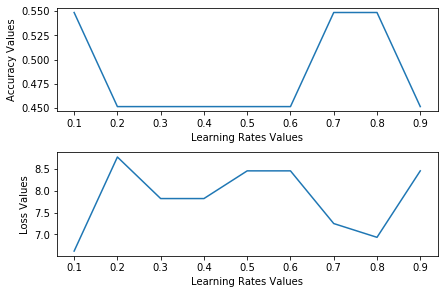

In [14]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(lrs,acc_lrs)
plt.xlabel("Learning Rates Values")
plt.ylabel("Accuracy Values")

plt.subplot(2,1,2)
plt.plot(lrs,loss_lrs)
plt.xlabel("Learning Rates Values")
plt.ylabel("Loss Values")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()